# Activity: Perform logistic regression 

## Introduction

In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [1]:
### YOUR CODE HERE ###

# Standard operational package imports.
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

The dataset **Invistico_Airline.csv** is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

Output the first 10 rows of data.

In [3]:
### YOUR CODE HERE ###
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [4]:
### YOUR CODE HERE ###
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [5]:
### YOUR CODE HERE ###
df_original['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [6]:
# Percentage
satisfied = df_original['satisfaction'].value_counts()['satisfied']
satisfied_percent = satisfied/df_original['satisfaction'].count()
print(satisfied_percent)

0.5473283030489683


**Question:** How many satisfied and dissatisfied customers were there?

ZY: There were 71087 satisfied customers.

**Question:** What percentage of customers were satisfied?

ZY: 54.73% of customers are satisfied.

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [7]:
### YOUR CODE HERE ###
df_original[df_original.isnull().any(axis=1)]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Loyal Customer,44,Business travel,Business,3431,2,2,3,2,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Loyal Customer,39,Business travel,Business,1595,4,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Loyal Customer,45,Business travel,Eco,871,5,1,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,2,...,3,3,1,4,3,3,4,3,0,NaN


In [8]:
# Count of missing values
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

ZY: Yes, these missing values may pose a challenge. Firstly, the inconsistency in data collection renders these rows untrustworthy. Secondly, the column may be needed eventually. Lasty, 393 only constitutes of a small portion of the 192880 rows of data that we already have, likely having little to no impact.

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [9]:
### YOUR CODE HERE ###
df_subset = df_original.dropna()

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [10]:
### YOUR CODE HERE ###
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [11]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [12]:
### YOUR CODE HERE ###
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [13]:
### YOUR CODE HERE ###
X = df_subset[['Inflight entertainment']]
y = df_subset[['satisfaction']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

ZY: No, there are other factors that can affect satisfaction. Most other features in df_subset affect satisfaction.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [14]:
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_train, y_train)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `LogisticRegression()` and the `fit()` function on the training set. `LogisticRegression().fit(X_train,y_train)`.

</details>

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [15]:
### YOUR CODE HERE ###
intercept = clf.intercept_

In [16]:
### YOUR CODE HERE ###
coef = clf.coef_

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

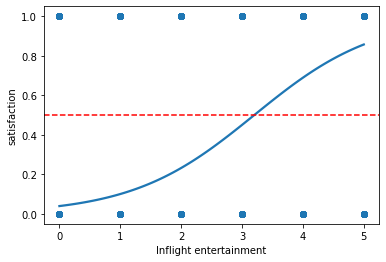

In [17]:
### YOUR CODE HERE ###
fig = sns.regplot(data=df_subset, x='Inflight entertainment', y='satisfaction', logistic = True, ci=None)
fig.axhline(y=0.5,linestyle='--',color='red')
plt.show()

**Question:** What can you tell from the graph?

ZY: When inflight entertainment rises, satisfaction rises too. But not much information provided as inflight entertainment is categorical.

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [18]:
### YOUR CODE HERE ###

# Save predictions.
y_pred = clf.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [19]:
### YOUR CODE HERE ###
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


### Use the `predict_proba` and `predict` functions on `X_test`

In [20]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
clf.predict_proba(X_test)[::,-1]

array([0.85741932, 0.44991598, 0.10010671, ..., 0.10010671, 0.23173775,
       0.44991598])

In [21]:
# Use predict to output 0's and 1's.

### YOUR CODE HERE ###
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [22]:
### YOUR CODE HERE ###
import sklearn.metrics as metrics
print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')
print(f'Precision: {metrics.precision_score(y_test,y_pred)}')
print(f'Recall: {metrics.recall_score(y_test,y_pred)}')

Accuracy: 0.8015290756042938
Precision: 0.8161420273561926
Recall: 0.8215296114673708


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

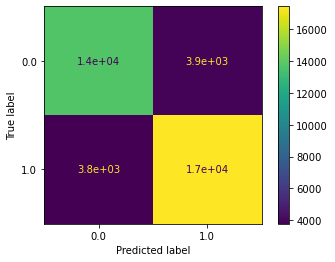

In [23]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

**Question:** What stands out to you about the confusion matrix?

ZY: Essentiall 0 means negative and 1 means positive. A positive is considered as satisfied and a negative is consider as unsatisfied. This is also evident from the chart, where the top left and bottom right quadrants are true negatives and positives respectively, whereas the top right and bottom left are false positive and false negative respectively. From the numbers, the model did quite well.

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

ZY: No, the model made roughly the same amount of false negative and false positive errors.

**Question:** What do you think could be done to improve model performance?

ZY: I think that using continuous variables might be more helpful as compared to categorical variables. Use more than one feature.

## Considerations

**What are some key takeaways that you learned from this lab?**

ZY: I learn to copy paste code from my cheatsheet. But more importantly, when to use what. Learnt another method to do one hot encoding other than get_dummies.

**What findings would you share with others?**

ZY: I would share that reading the confusion matrix is not as difficult as you think it is. The model was 80.2% accurate.

**What would you recommend to stakeholders?**

ZY: Increase Inflight entertainment to increase customer satisfaction.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 